#**Profil**

Nama: Nur Muhammad Ainul Yaqin</br>
NRP: 5025201011</br>
Departemen: Teknik Informatika 2020</br>
Institusi: Institut Teknologi Sepuluh Nopember</br>
Tanggal pengambilan data: 15 Nopember 2020</br>
Tanggal mulai pengerjaan: 15 Nopember 2020</br>
Dataset yang digunakan: [Tipe Hangout Remaja](https://drive.google.com/file/d/1wFkPvfwH4zTTQ5L3Rjr8PIilSU4XVp3e/view?usp=sharing)


In [153]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tipe_Hangout.csv')

In [155]:
df.head()

,Timestamp,Nama,Umur,Jenis kelamin,"Lokasi tempat tinggal Anda saat ini (Contoh: Kota Madiun, maka ditulis Madiun, dan diawali huruf kapital)",Bersama siapa Anda lebih senang bergaul?,Kegiatan yang paling disukai ketika bergaul/hangout,Apakah bagimu saling follow (mutual) di media sosial itu penting?
0,11/15/2020 12:46:19,Aldi,18,Laki-laki,Madiun,Laki-laki,Nongkrong sambil nugas,Ya
1,11/15/2020 12:47:15,Alifka,17,Perempuan,Ponorogo,Laki-laki dan perempuan,"Nongkrong santai, termasuk julid",Ya
2,11/15/2020 12:47:36,Akbar Rezy Hanara Setiyawan,18,Laki-laki,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Tidak
3,11/15/2020 12:47:41,Maudhy Ferari,19,Perempuan,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Ya
4,11/15/2020 12:47:46,Insan Dienuari,18,Perempuan,Pilangbango,Laki-laki dan perempuan,Food hunting,Ya


#**Data Preprocessing**

In [156]:
df=df.iloc[:,1:]

In [157]:
df.head()

,Nama,Umur,Jenis kelamin,"Lokasi tempat tinggal Anda saat ini (Contoh: Kota Madiun, maka ditulis Madiun, dan diawali huruf kapital)",Bersama siapa Anda lebih senang bergaul?,Kegiatan yang paling disukai ketika bergaul/hangout,Apakah bagimu saling follow (mutual) di media sosial itu penting?
0,Aldi,18,Laki-laki,Madiun,Laki-laki,Nongkrong sambil nugas,Ya
1,Alifka,17,Perempuan,Ponorogo,Laki-laki dan perempuan,"Nongkrong santai, termasuk julid",Ya
2,Akbar Rezy Hanara Setiyawan,18,Laki-laki,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Tidak
3,Maudhy Ferari,19,Perempuan,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Ya
4,Insan Dienuari,18,Perempuan,Pilangbango,Laki-laki dan perempuan,Food hunting,Ya


In [158]:
df.columns = ['nama', 'umur', 'gender', 'lokasi', 'genderteman', 'kegiatan', 'mutual' ]

In [159]:
df.head()

,nama,umur,gender,lokasi,genderteman,kegiatan,mutual
0,Aldi,18,Laki-laki,Madiun,Laki-laki,Nongkrong sambil nugas,Ya
1,Alifka,17,Perempuan,Ponorogo,Laki-laki dan perempuan,"Nongkrong santai, termasuk julid",Ya
2,Akbar Rezy Hanara Setiyawan,18,Laki-laki,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Tidak
3,Maudhy Ferari,19,Perempuan,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Ya
4,Insan Dienuari,18,Perempuan,Pilangbango,Laki-laki dan perempuan,Food hunting,Ya


#**Data Cleaning**

In [160]:
df=df[df['lokasi']=='Madiun']

In [161]:
df.head()

,nama,umur,gender,lokasi,genderteman,kegiatan,mutual
0,Aldi,18,Laki-laki,Madiun,Laki-laki,Nongkrong sambil nugas,Ya
2,Akbar Rezy Hanara Setiyawan,18,Laki-laki,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Tidak
3,Maudhy Ferari,19,Perempuan,Madiun,Laki-laki dan perempuan,Nongkrong sambil nugas,Ya
5,Nizar Rahma Auliyaa,18,Perempuan,Madiun,Perempuan,Nonton film,Tidak
6,Naufal,19,Laki-laki,Madiun,Laki-laki dan perempuan,Rekreasi di alam,Tidak


In [162]:
df['gender']=df['gender'].apply(lambda kelamin:0 if(kelamin=='Laki-laki') else 1)

In [163]:
def ubahgenderteman(a):
  if a=='Laki-laki':
    return '0';
  elif a=='Perempuan':
    return '1';
  elif a=='Laki-laki dan perempuan':
    return '2';


In [164]:
df['genderteman']=df['genderteman'].apply(lambda x:ubahgenderteman(x))

In [165]:
df['mutual']=df['mutual'].apply(lambda ikuti:0 if(ikuti=='Tidak') else 1)

In [166]:
df.head()

,nama,umur,gender,lokasi,genderteman,kegiatan,mutual
0,Aldi,18,0,Madiun,0,Nongkrong sambil nugas,1
2,Akbar Rezy Hanara Setiyawan,18,0,Madiun,2,Nongkrong sambil nugas,0
3,Maudhy Ferari,19,1,Madiun,2,Nongkrong sambil nugas,1
5,Nizar Rahma Auliyaa,18,1,Madiun,1,Nonton film,0
6,Naufal,19,0,Madiun,2,Rekreasi di alam,0


#**Data Processing**

In [167]:
df['Hitung']=1

In [168]:
data_sum=df.groupby('kegiatan').sum()['Hitung']

In [169]:
kegiatans=df['kegiatan'].unique()
banyak_kegiatan=df['kegiatan'].value_counts()
print(kegiatans)
print(banyak_kegiatan)

['Nongkrong sambil nugas' 'Nonton film' 'Rekreasi di alam' 'Berolahraga'
 'Nongkrong santai, termasuk julid' 'Nge-mall' 'Food hunting'
 'Riding atau berkeliling-keliling']
Nongkrong santai, termasuk julid    21
Nongkrong sambil nugas              13
Food hunting                         7
Nonton film                          6
Rekreasi di alam                     5
Riding atau berkeliling-keliling     4
Berolahraga                          2
Nge-mall                             1
Name: kegiatan, dtype: int64


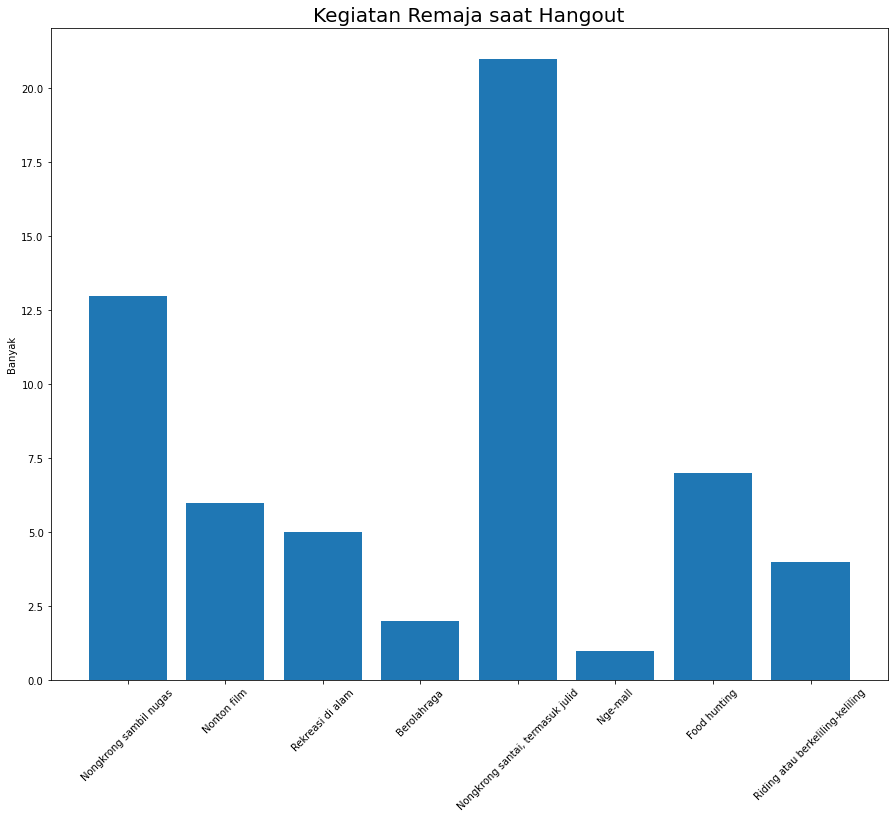

In [170]:
plt.figure(figsize=(15,12))
plt.bar(kegiatans, banyak_kegiatan[kegiatans])
plt.title('Kegiatan Remaja saat Hangout', fontsize=20)
plt.ylabel('Banyak')
plt.xticks(rotation=45)
plt.show()


In [171]:
genders=df['gender'].unique()
print(genders)
data_sum=df.groupby('gender').sum()
print(data_sum['mutual'])

[0 1]
gender
0     6
1    17
Name: mutual, dtype: int64


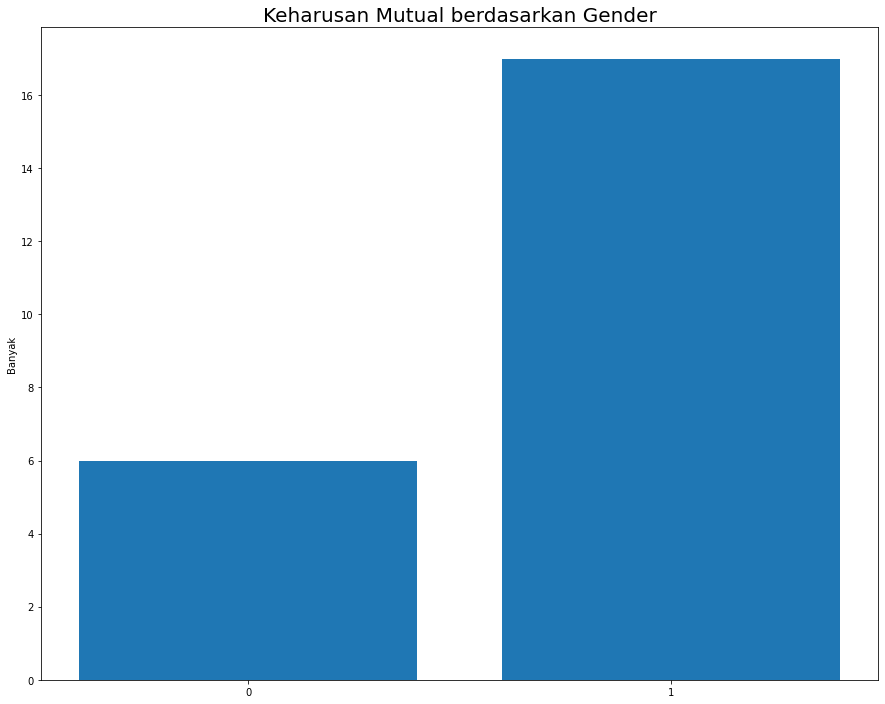

In [172]:
plt.figure(figsize=(15,12))
plt.bar(genders, data_sum['mutual'][genders])
plt.title('Keharusan Mutual berdasarkan Gender', fontsize=20)
plt.ylabel('Banyak')
plt.xticks(genders)
plt.show()

Text(0.5, 0, 'Jenis Kelamin')

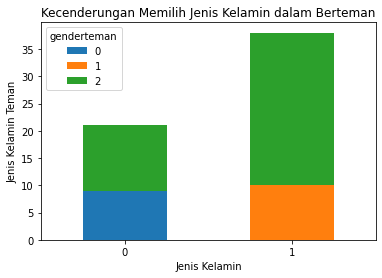

In [185]:
df.groupby(['gender','genderteman']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Kecenderungan Memilih Jenis Kelamin dalam Berteman')
plt.xticks(rotation=0)
plt.ylabel('Jenis Kelamin Teman')
plt.xlabel('Jenis Kelamin')

#**Data Conclusion**

Berdasarkan pengolahan data yang telah dilakukan, telah dilakukan Data Cleaning untuk mengambil data yang berlokasi Madiun. Hal itu dikarenakan data lokasi lain (selain Madiun) memiliki jumlah yang sedikit, berkisar 2-5 data untuk setiap lokasi tersebut. Sehingga, saya memfokuskan pengolahan data dengan data lokasi Madiun saja.

Selanjutnya, pada Data Processing, saya ingin mendapatkan data kegiatan berdasarkan data tersebut. Setelah diolah, didapatkan data berupa jumlah untuk masing-masing kegiatan saat bergaul, dengan modus dan maksimal untuk kegiatan adalah "Nongkrong santai, termasuk julid", disusul dengan "Nongkrong sambil nugas", dan "Food Hunting". Data tersebut disajikan dalam grafik batang. Sehingga dapat ditarik kesimpulan bahwa mayoritas remaja di Madiun menyukai kegiatan "Nongkrong santai, termasuk julid".

Kemudian, pada Data Processing selanjutnya saya mendapatkan data berupa keharusan untuk menjadi mutual di sosial media berdasarkan gender. Dalam data tersebut, jenis kelamin laki-laki disimbolkan dengan angka "0", dan perempuan disimbolkan dengan angka "1". Setelah data diolah, didapatkan hasil bahwa dalam pergaulan, perempuan cenderung untuk saling mutual di sosial media. Perbedaannya cukup signifikan antara laki-laki dan perempuan, seperti yang tersaji dalam grafik.

Dan yang terakhir, saya ingin mendapatkan data tentang pemilihan jenis kelamin dalam bergaul. Setelah data diolah, dapat diketahui bahwa setiap jenis kelamin, cenderung untuk tidak bergaul dengan lawan jenisnya. Namun, lebih cenderung untuk bergaul dengan keduanya (laki-laki dan perempuan) atau dengan sesamanya. Data tersebut tersaji dalam grafik.

Sekian kesimpulan yang bisa saya sampaikan berdasarkan pengolahan data survei yang telah dilakukan. Saya menyadari bahwa data ini tidak sepenuhnya akurat, karena jumlah pengisi survei yang berlokasi Madiun tidak banyak. Terima kasih.
